## NLP, NLTK, TextBlob, Sentiments, WordCloud

In [40]:
from textblob import TextBlob
import numpy as np

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize # import word_tokenize

from nltk.corpus import stopwords #import stop words
import re # import regular expression
from nltk.tokenize import word_tokenize # import word_tokenize
from sklearn.utils import shuffle # to shuffle the data
import random # import random
import sklearn # import sklearn
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS

In [161]:
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
# Loading the Dataset

dataset = pd.read_csv('CleanFile.csv')
dataset.head(3)

,Unnamed: 0,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Sentiment
0,0,2019-10-15 06:24:10,RT @JerotichSeii: That you be switched off.\n\...,en,TinkerBellLand,False,Twitter Web App,119,0,0.000
1,1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,NaN,False,Twitter for Android,0,1,0.375
2,2,2019-10-14 18:00:17,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,in,Nairobi,False,Twitter for Android,0,0,0.000


In [163]:
# Drop the Irrelevant Feature
dataset.drop(['Unnamed: 0'],inplace=True,axis=1)

In [166]:
print('Dataset size:',dataset.shape)
print('Columns are:',dataset.columns)

('Dataset size:', (634, 9))
('Columns are:', Index([u'Datetime Created', u'Tweet', u'Language', u'Location',
       u'UserAccount Verified', u'Tweet Source', u'Retweet_count',
       u'Favourite_count', u'Sentiment'],
      dtype='object'))


In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 9 columns):
Datetime Created        634 non-null object
Tweet                   634 non-null object
Language                634 non-null object
Location                404 non-null object
UserAccount Verified    634 non-null bool
Tweet Source            634 non-null object
Retweet_count           634 non-null int64
Favourite_count         634 non-null int64
Sentiment               634 non-null float64
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 40.3+ KB


In [168]:
dataset.head(3)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Sentiment
0,2019-10-15 06:24:10,RT @JerotichSeii: That you be switched off.\n\...,en,TinkerBellLand,False,Twitter Web App,119,0,0.000
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,NaN,False,Twitter for Android,0,1,0.375
2,2019-10-14 18:00:17,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,in,Nairobi,False,Twitter for Android,0,0,0.000


### Plot the Correlation Matrix to see the correlation between Tweet, Favorite Count and Retweets

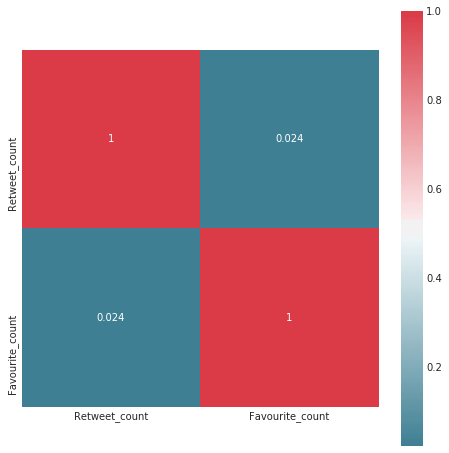

In [175]:
columns_show=['Tweet', 'Retweet_count','Favourite_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = dataset[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [169]:
from datetime import date

In [170]:
dataset['Datetime Created'] = pd.to_datetime(dataset['Datetime Created'])

In [171]:
dataset['Year'] = dataset['Datetime Created'].dt.year
dataset['Week of the Year'] = dataset['Datetime Created'].dt.weekofyear
dataset['Day of the Year'] = dataset['Datetime Created'].dt.dayofyear
dataset['Month_name'] = dataset['Datetime Created'].dt.month_name()
dataset['Day of the Week'] = dataset['Datetime Created'].dt.weekday
dataset['Name of the Day'] = dataset['Datetime Created'].dt.day_name()
dataset['Hour'] = dataset['Datetime Created'].dt.hour
dataset['Minute'] = dataset['Datetime Created'].dt.minute

### Top 5 Locations of the Tweets 

Text(0.5,1,'Top 5 Locations of the Most Tweets')

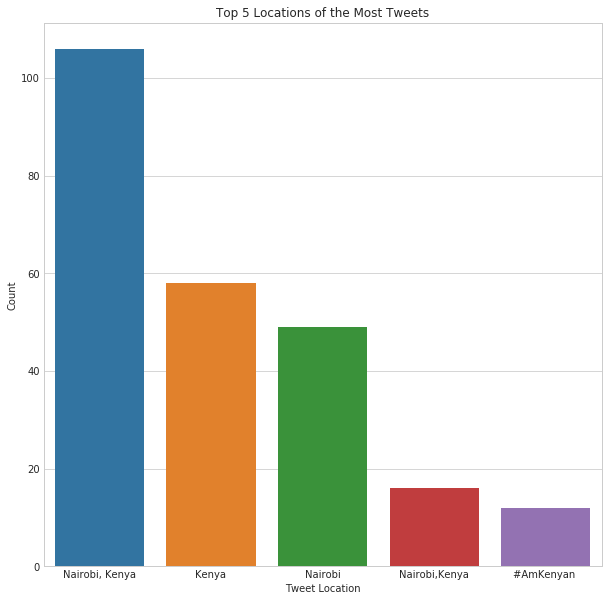

In [172]:
trending_location=dataset.groupby(by=['Location'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=usa_trending_channel['Location'],y=trending_location['Tweet'], data=trending_location)
plt.xlabel("Tweet Location")
plt.ylabel("Count")
plt.title("Top 5 Locations of the Most Tweets")

## Days of the Week Vs the Tweets Per Day

Text(0.5,1,'Days of the Week Vs the Tweets tweeted per Day')

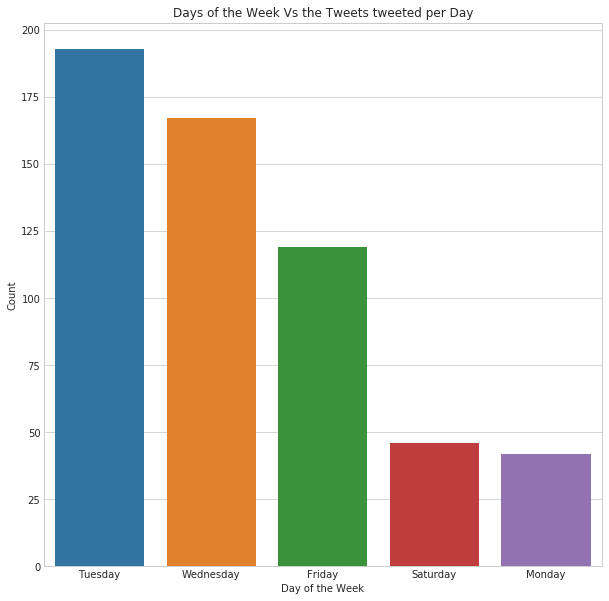

In [124]:
day_of_the_week=dataset.groupby(by=['Name of the Day'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Name of the Day'],y=day_of_the_week['Tweet'], data=day_of_the_week)
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Days of the Week Vs the Tweets tweeted per Day")

## Language  Used in the Tweets

Text(0.5,1,'Language of the Tweets')

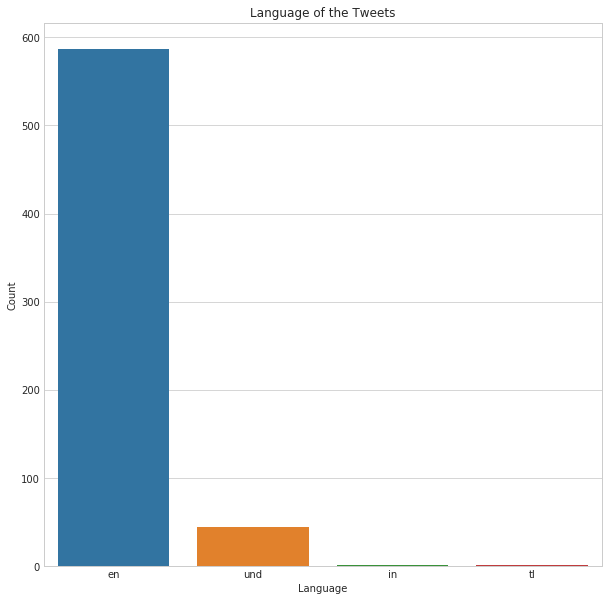

In [128]:
day_of_the_week=dataset.groupby(by=['Language'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Language'],y=day_of_the_week['Tweet'], data=day_of_the_week)
plt.xlabel("Language")
plt.ylabel("Count")
plt.title("Language of the Tweets")

### Device Type Used to Tweet

Text(0.5,1,'Device Type used to Tweet')

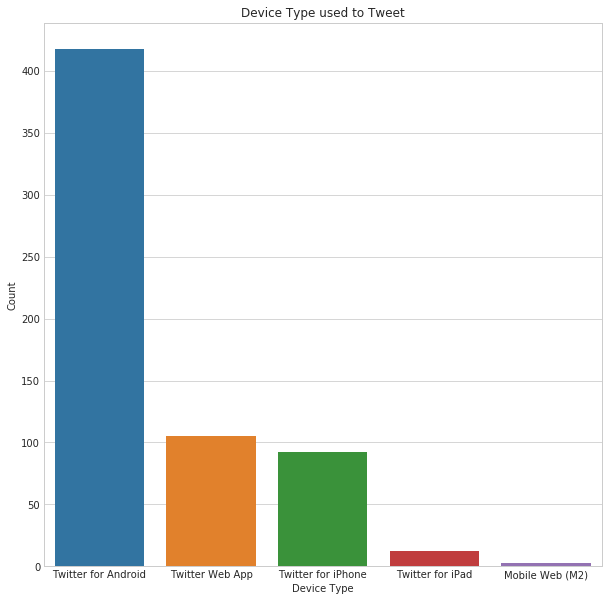

In [136]:
day_of_the_week=dataset.groupby(by=['Tweet Source'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Tweet Source'],y=day_of_the_week['Tweet'], data=day_of_the_week)
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.title("Device Type used to Tweet")

## Top 5 Days of the Year vs the Hours the Maximum Tweets were made

Text(0.5,1,'Top 5 Days of the Year Tweets were made')

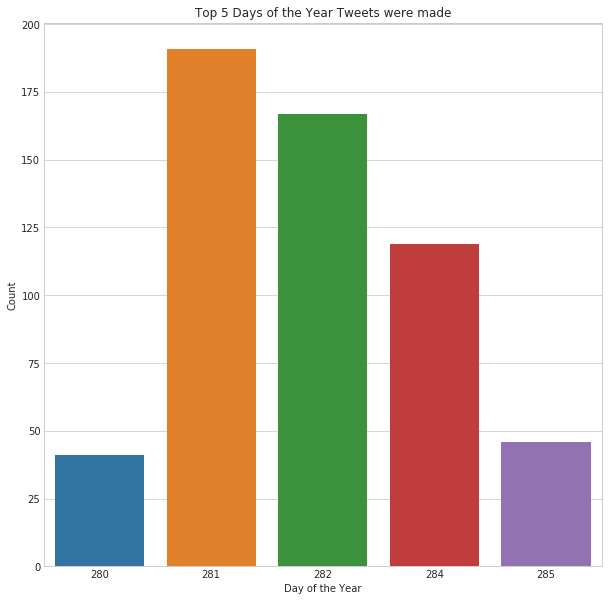

In [146]:
day_of_the_week=dataset.groupby(by=['Day of the Year'],as_index=False).count().sort_values(by='Hour',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Day of the Year'],y=day_of_the_week['Hour'], data=day_of_the_week)
plt.xlabel("Day of the Year")
plt.ylabel("Count")
plt.title("Top 5 Days of the Year Tweets were made")

Text(0.5,1,'Top 5 Days of the Year Tweets were made')

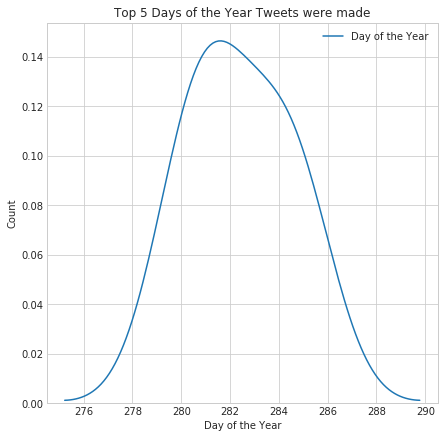

In [176]:
Day_of_the_year=dataset.groupby(by=['Day of the Year'],as_index=False).count().sort_values(by='Hour',ascending=False).head(5)

plt.figure(figsize=(7,7))
sns.kdeplot(Day_of_the_year['Day of the Year']);
plt.xlabel("Day of the Year")
plt.ylabel("Count")
plt.title("Top 5 Days of the Year Tweets were made")


## Retweet Counts Vs the Hour  Kernel Density Plot

Text(0.5,1,'Top 5 Retweet Counts Vs the Hour: Kernel Density Plot')

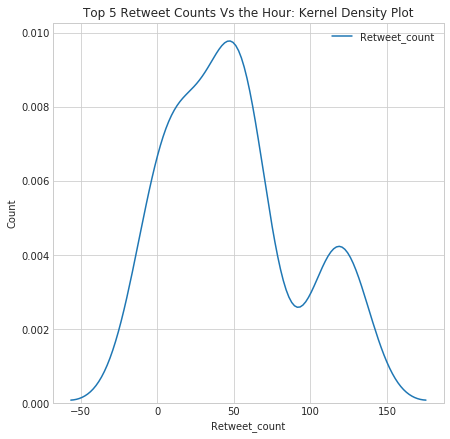

In [158]:
Day_of_the_year=dataset.groupby(by=['Retweet_count'],as_index=False).count().sort_values(by='Hour',ascending=False).head(5)

plt.figure(figsize=(7,7))
sns.kdeplot(Day_of_the_year['Retweet_count']);
plt.xlabel("Retweet_count")
plt.ylabel("Count")
plt.title("Top 5 Retweet Counts Vs the Hour: Kernel Density Plot")

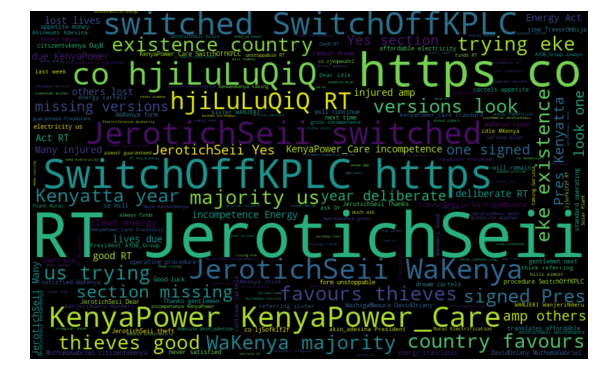

In [177]:
# Creating word Cloud for all Words in all tweets
allWords = ' '.join([text for text in dataset['Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [94]:
# Number of stopwords

stop = stopwords.words('english')
dataset['stopwords'] = dataset['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset[['Tweet','stopwords']].head()

,Tweet,stopwords
0,RT @JerotichSeii: That you be switched off.\n\...,2
1,UK renewables generate more electricity than f...,4
2,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,0
3,@KenyaPower_Care This was not attended to. We ...,8
4,@osore_tunu @KenyaPower_Care KPLC must be swit...,1


In [97]:
# Number of stopwords

stop = stopwords.words('english')
dataset['stopwords'] = dataset['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset[['Tweet','stopwords']].head()

,Tweet,stopwords
0,RT @JerotichSeii: That switched off. #SwitchOf...,0
1,UK renewables generate electricity fossil fuel...,0
2,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,0
3,@KenyaPower_Care This attended to. We still da...,0
4,@osore_tunu @KenyaPower_Care KPLC must switche...,0
